In [70]:
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import adam
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img
from sklearn.preprocessing import OneHotEncoder

In [45]:
mnist = np.load("../datasets/mnist_train_small.npy")

In [46]:
X, y = mnist[:, 1:].reshape(-1, 28, 28, 1), mnist[:, 0]

In [47]:
ohe = OneHotEncoder(categories="auto")

In [48]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [49]:
gen = ImageDataGenerator(zoom_range=.2, shear_range=.1, ).flow(X, y_hot, batch_size=320)

In [71]:
in_layer = Input((28,28, 1))
conv1 = Conv2D(16, (3, 3))(in_layer)
pool1 = MaxPool2D()(conv1)
conv2 = Conv2D(32, (3, 3))(pool1)
pool2 = MaxPool2D()(conv2)
flat = Flatten()(pool2)
d1 = Dense(400, activation="relu")(flat)
drop1 = Dropout(rate=0.25)(d1)
d2 = Dense(200, activation="relu")(drop1)
drop2 = Dropout(rate=0.25)(d2)
d3 = Dense(100, activation="relu")(drop2)
out = Dense(10, activation="softmax")(d3)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [72]:
model = Model(inputs=[in_layer], outputs=[out])

In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 400)               320400    
__________

In [74]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [75]:
model.fit_generator(gen, steps_per_epoch=50, epochs=10)

Epoch 1/10
50/50 [==============================] - 6s 117ms/step - loss: 9.7004 - acc: 0.3790
Epoch 2/10
50/50 [==============================] - 5s 110ms/step - loss: 4.2368 - acc: 0.7018
Epoch 3/10
50/50 [==============================] - 5s 107ms/step - loss: 1.4191 - acc: 0.8339
Epoch 4/10
50/50 [==============================] - 5s 106ms/step - loss: 0.3594 - acc: 0.9104
Epoch 5/10
50/50 [==============================] - 5s 107ms/step - loss: 0.2638 - acc: 0.9301
Epoch 6/10
50/50 [==============================] - 5s 110ms/step - loss: 0.2094 - acc: 0.9447
Epoch 7/10
50/50 [==============================] - 5s 107ms/step - loss: 0.1763 - acc: 0.9492
Epoch 8/10
50/50 [==============================] - 5s 109ms/step - loss: 0.1572 - acc: 0.9569
Epoch 9/10
50/50 [==============================] - 5s 108ms/step - loss: 0.1478 - acc: 0.9586
Epoch 10/10
50/50 [==============================] - 6s 112ms/step - loss: 0.1284 - acc: 0.9629


In [76]:
model.evaluate_generator(gen, steps=10)

[0.06013865619897842, 0.9840624988079071]

In [58]:
len(X_test)

6600

In [59]:
model.predict(X_test[:10])

array([[4.0274258e-06, 1.1827090e-06, 4.0759690e-04, 7.7223187e-05,
        8.2360503e-07, 5.3463776e-08, 6.7182229e-09, 9.9876213e-01,
        1.9856230e-05, 7.2717562e-04],
       [1.1017884e-06, 2.5717904e-08, 1.3354450e-07, 1.3133698e-07,
        5.9759148e-10, 8.5169198e-12, 1.5963362e-13, 9.9995959e-01,
        1.6780218e-08, 3.9047845e-05],
       [9.9512297e-01, 4.6875433e-14, 1.3542972e-05, 1.0193923e-11,
        1.3461229e-09, 3.2059049e-12, 2.3970909e-11, 2.3060887e-09,
        2.2179650e-08, 4.8634307e-03],
       [2.3381426e-09, 1.6913283e-12, 4.6870428e-11, 2.1959067e-10,
        1.8354015e-08, 1.1054182e-11, 3.3995398e-12, 3.5284400e-09,
        1.9688279e-08, 1.0000000e+00],
       [2.2745375e-12, 2.3474411e-09, 8.3529778e-10, 7.8244564e-12,
        9.9992347e-01, 6.8746883e-12, 6.7229685e-13, 8.9004379e-06,
        7.9968494e-08, 6.7457760e-05],
       [4.4193656e-11, 2.8456729e-14, 7.8708004e-15, 8.7813099e-09,
        3.4330037e-09, 9.9999976e-01, 6.2187291e-12, 9.43

In [60]:
y_test[:10].todense().argmax(axis=1)

AttributeError: 'matrix' object has no attribute 'todense'

array([[5, 7, 3, 4, 1, 9, 2, 6, 8, 0]])

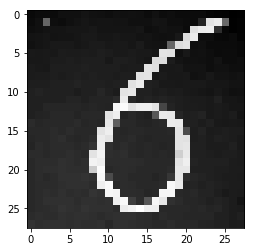

In [99]:
img = load_img("../datasets/nums/six.jpeg", target_size=(28, 28), grayscale=True)
plane = (255 - np.array(img)).astype(int)
plt.imshow(plane, cmap="gray")
model.predict(np.array([plane.reshape(28, 28, 1)])).argsort(axis=1)

In [43]:
ImageDataGenerator?

Init signature:
ImageDataGenerator(
    ['featurewise_center=False', 'samplewise_center=False', 'featurewise_std_normalization=False', 'samplewise_std_normalization=False', 'zca_whitening=False', 'zca_epsilon=1e-06', 'rotation_range=0', 'width_shift_range=0.0', 'height_shift_range=0.0', 'brightness_range=None', 'shear_range=0.0', 'zoom_range=0.0', 'channel_shift_range=0.0', "fill_mode='nearest'", 'cval=0.0', 'horizontal_flip=False', 'vertical_flip=False', 'rescale=None', 'preprocessing_function=None', 'data_format=None', 'validation_split=0.0', 'dtype=None'],
)
Docstring:     
Generate batches of tensor image data with real-time data augmentation.
 The data will be looped over (in batches).

# Arguments
    featurewise_center: Boolean.
        Set input mean to 0 over the dataset, feature-wise.
    samplewise_center: Boolean. Set each sample mean to 0.
    featurewise_std_normalization: Boolean.
        Divide inputs by std of the dataset, feature-wise.
    samplewise_std_normalization